In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load in data
df=pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49704 entries, 0 to 49703
Data columns (total 16 columns):
Unnamed: 0      49704 non-null int64
user_id         49704 non-null object
item_id         49704 non-null int64
recommend       49704 non-null int64
review          49680 non-null object
publisher       49699 non-null object
genres          49704 non-null object
app_name        49704 non-null object
title           49704 non-null object
url             49704 non-null object
release_date    49704 non-null object
tags            49704 non-null object
specs           49704 non-null object
price           49704 non-null float64
early_access    49704 non-null bool
developer       49704 non-null object
dtypes: bool(1), float64(1), int64(3), object(11)
memory usage: 5.7+ MB


In [3]:
df.head()

,Unnamed: 0,user_id,item_id,recommend,review,publisher,genres,app_name,title,url,release_date,tags,specs,price,early_access,developer
0,0,76561197970982479,1250,1,Simple yet with great replayability. In my opi...,Tripwire Interactive,['Action'],Killing Floor,Killing Floor,http://store.steampowered.com/app/1250/Killing...,2009-05-14,"['FPS', 'Zombies', 'Co-op', 'Survival', 'Actio...","['Single-player', 'Multi-player', 'Co-op', 'Cr...",19.99,False,Tripwire Interactive
1,1,76561197970982479,22200,1,It's unique and worth a playthrough.,ACE Team,"['Action', 'Indie']",Zeno Clash,Zeno Clash,http://store.steampowered.com/app/22200/Zeno_C...,2009-04-21,"['Action', 'Indie', 'Surreal', ""Beat 'em up"", ...","['Single-player', 'Steam Achievements', 'Steam...",9.99,False,ACE Team
2,4,js41637,227300,1,For a simple (it's actually not all that simpl...,SCS Software,"['Indie', 'Simulation']",Euro Truck Simulator 2,Euro Truck Simulator 2,http://store.steampowered.com/app/227300/Euro_...,2013-01-16,"['Simulation', 'Driving', 'Open World', 'Reali...","['Single-player', 'Steam Achievements', 'Steam...",19.99,False,SCS Software
3,5,js41637,239030,1,Very fun little game to play when your bored o...,3909,"['Adventure', 'Indie']","Papers, Please","Papers, Please",http://store.steampowered.com/app/239030/Paper...,2013-08-08,"['Indie', 'Political', 'Simulation', 'Point & ...","['Single-player', 'Steam Achievements', 'Steam...",9.99,False,3909
4,6,evcentric,248820,1,A suitably punishing roguelike platformer. Wi...,Chucklefish,"['Action', 'Indie', 'RPG']",Risk of Rain,Risk of Rain,http://store.steampowered.com/app/248820/Risk_...,2013-11-08,"['Rogue-like', 'Indie', 'Platformer', 'Action'...","['Single-player', 'Multi-player', 'Co-op', 'Sh...",9.99,False,"Hopoo Games, LLC"


### Q1: Does [Action] games cost more than [Action, Indie] games?
**Null Hypothesis**: average price of [Action] games $\geq$ average price of [Action, Indie] games.\
**Alternative Hypothesis**: average price of [Action] games < average price of [Action, Indie]  games.\
**Alpha**=5%

In [8]:
# Filter rows
act_ind=df[df['genres']=="['Action', 'Indie']"]
act=df[df['genres']=="['Action']"]

In [9]:
# Use boostrap to find the distributions and calculate CI
diff_list=[]
act_ind_meanlist=[]
act_mean_list=[]
for i in range(10000):
    act_ind_samp=np.random.choice(act_ind['price'],len(act_ind['price']))
    act_samp=np.random.choice(act['price'],len(act['price']))
    act_ind_mean=np.mean(act_ind_samp)
    act_ind_meanlist.append(act_ind_mean)
    act_mean=np.mean(act_samp)
    act_mean_list.append(act_mean)
    diff=act_mean-act_ind_mean
    diff_list.append(diff)
percentile=np.percentile(diff_list,[5,95])
print('95% Confidence Interval: '+str(percentile))

95% Confidence Interval: [5.79101534 6.50657473]


Text(0.5, 1.0, 'Average Price of Different Genres Distribution')

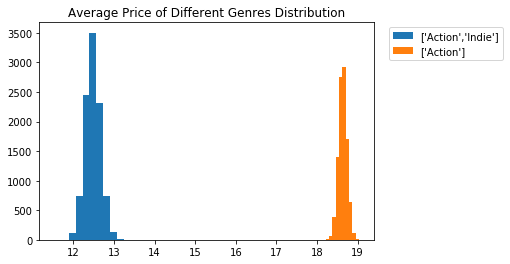

In [11]:
# Plot the distributions
plt.hist(act_ind_meanlist,label="['Action','Indie']")
plt.hist(act_mean_list,label="['Action']")
plt.legend(loc='upper right',bbox_to_anchor=(1.4, 1))
plt.title('Average Price of Different Genres Distribution')

In [57]:
# Find p-value 
stats.ttest_ind(np.mean(act_ind),np.mean(act))

Ttest_indResult(statistic=0.7592294153523514, pvalue=0.469492828937194)

In [8]:
# Determine to reject or accept H0
if (0.469492828937194/2) < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Cannot Reject Null Hypothesis')

Cannot Reject Null Hypothesis


**Conlusion**: It is clear from the distribution graph that ['Action'] games always have higher price than ['Action','Indie'] games. The p-value further prove that we cannot reject null hypothesis.

### Q2: Does multiplayer game cost less than single player game?
**Null Hypothesis**: Average price of single player games $\geq$ average price of multiplayer games.\
**Alternativve Hypothesis**: Average price of single player games < average price of multiplayer games.\
**Alpha**=5%

In [4]:
# Filter rows
online_multi=df[df['specs'].str.contains("'Online Multi-player'")]
multi=df[df['specs'].str.contains("'Multi-player'")]
online_coop=df[df['specs'].str.contains("'Online Co-op'")]
cross_plat=df[df['specs'].str.contains("'Cross-Platform Multiplayer'")]
coop=df[df['specs'].str.contains("'Co-op'")]
multi=pd.concat([online_multi,multi,coop,online_coop,cross_plat])
counter=df.index.isin(multi.index)
single=df[~counter]

In [5]:
# Use boostrap to find the distributions and calculate CI
diff_list=[]
multi_meanlist=[]
single_mean_list=[]
for i in range(10000):
    multi_samp=np.random.choice(multi['price'],len(multi['price']))
    single_samp=np.random.choice(single['price'],len(single['price']))
    multi_mean=np.mean(multi_samp)
    multi_meanlist.append(multi_mean)
    single_mean=np.mean(single_samp)
    single_mean_list.append(single_mean)
    diff=single_mean-multi_mean
    diff_list.append(diff)
percentile=np.percentile(diff_list,[5,95])
print('95% Confidence Interval: '+str(percentile))

95% Confidence Interval: [-2.93274549 -2.60298355]


Text(0.5, 1.0, 'Average Price of Single VS Multi Player Games Distribution')

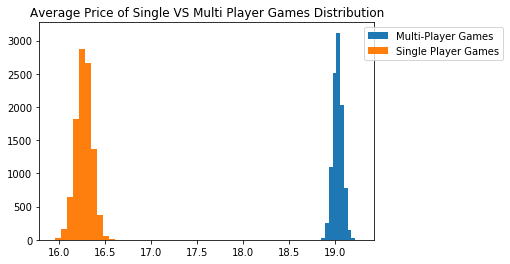

In [12]:
# Plot the distributions
plt.hist(multi_meanlist,label="Multi-Player Games")
plt.hist(single_mean_list,label="Single Player Games")
plt.legend(loc='upper right',bbox_to_anchor=(1.4, 1))
plt.title('Average Price of Single VS Multi Player Games Distribution')

**Conclusion**: From the distribution graph, it is clear that Single players games do not cost more than multi player games. In fact, multiplayer games actually cost more than single player games. 

### Q3: Among two most popular games (Counter Strike and Team Fortress 2), which has better reputation in term of recommendation?
**Null Hypothesis**: percentage of recommended from Counter Strike $\geq$ percentage of recommended from Team Fortress 2\
**Alternative Hypothesis**: percentage of recommended from Counter Strike < percentage of recommended from Team Fortress 2\
**Alpha**=5%

In [20]:
# Filter rows
cs=df[df['title'].str.contains("Counter-Strike: Global Offensive")]
tf=df[df['title'].str.contains("Team Fortress 2")]

In [30]:
# Use boostrap to find the distributions and calculate CI
diff_list=[]
cs_percent_list=[]
tf_percent_list=[]
for i in range(10000):
    cs_samp=np.random.choice(multi['recommend'],len(multi['recommend']))
    tf_samp=np.random.choice(single['recommend'],len(single['recommend']))
    cs_percent=round((cs_samp.sum())/len(cs_samp)*100,2)
    cs_percent_list.append(cs_percent)
    tf_percent=round((tf_samp.sum())/len(tf_samp)*100,2)
    tf_percent_list.append(tf_percent)
    diff=cs_percent-tf_percent
    diff_list.append(diff)
percentile=np.percentile(diff_list,[5,95])
print('95% Confidence Interval: '+str(percentile))

95% Confidence Interval: [-0.43    0.4505]


Text(0.5, 1.0, 'Percentage of Recommendation Distribution')

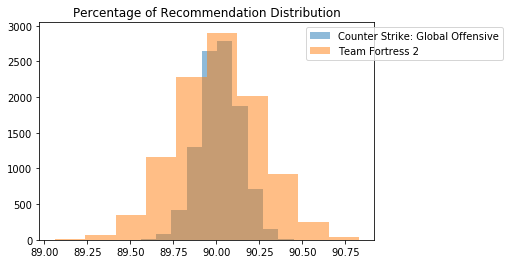

In [35]:
# Plot the distributions
plt.hist(cs_percent_list,alpha=0.5,label="Counter Strike: Global Offensive")
plt.hist(tf_percent_list,alpha=0.5,label="Team Fortress 2")
plt.legend(loc='upper right',bbox_to_anchor=(1.4, 1))
plt.title('Percentage of Recommendation Distribution')

**Conclusion**: From the distribution graph above, we see that the distributions of percentage overlay on top of each other. The confidence interval further validate the distributions. In conclusion, it's inconclusive whether the recommendation rate from Counter Strike is higher than Team Fortress 2 because the CI includes postive and negative boundries. 